In [2]:
import pandas as pd
import os

DATA_DIR = 'data/'
POPULATION_DATA_DIR = DATA_DIR + 'population/'
PROCESSED_DATA_DIR = DATA_DIR + "processed/"

## Stats

In [32]:
files = os.listdir(POPULATION_DATA_DIR)
census_files = [file for file in files if '.xlsx' in file]

In [31]:
years = []
entries = []
for filename in sorted(census_files):
    years.append(int(filename.split(".")[0]))
    df_year = pd.read_excel(POPULATION_DATA_DIR+filename, index_col=0)
    entries.append(len(df_year))
    print(f"Year: {filename}, entries {len(df_year)}")

Year: 1835.xlsx, entries 3945
Year: 1836.xlsx, entries 3999
Year: 1837.xlsx, entries 4025
Year: 1838.xlsx, entries 3918
Year: 1839.xlsx, entries 4060
Year: 1840.xlsx, entries 3973
Year: 1841.xlsx, entries 4114
Year: 1842.xlsx, entries 4149
Year: 1843.xlsx, entries 3939
Year: 1844.xlsx, entries 4175
Year: 1845.xlsx, entries 4301
Year: 1846.xlsx, entries 4405
Year: 1847.xlsx, entries 4139
Year: 1848.xlsx, entries 4086
Year: 1849.xlsx, entries 4201
Year: 1850.xlsx, entries 4219
Year: 1851.xlsx, entries 4242
Year: 1852.xlsx, entries 4393
Year: 1853.xlsx, entries 4452
Year: 1854.xlsx, entries 4468
Year: 1855.xlsx, entries 4608
Year: 1856.xlsx, entries 4623
Year: 1857.xlsx, entries 4538
Year: 1858.xlsx, entries 4606
Year: 1859.xlsx, entries 4726
Year: 1860.xlsx, entries 4773
Year: 1861.xlsx, entries 4879
Year: 1862.xlsx, entries 5007
Year: 1863.xlsx, entries 5140
Year: 1864.xlsx, entries 5174
Year: 1865.xlsx, entries 5245
Year: 1866.xlsx, entries 5706
Year: 1867.xlsx, entries 5541
Year: 1868

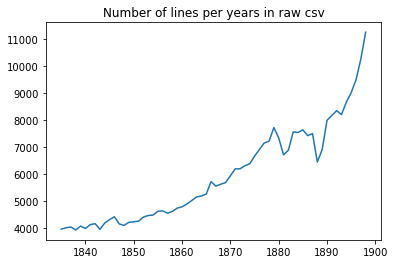

In [34]:
plt.plot(years, entries)
plt.title("Number of lines per years in raw csv")
plt.show()

In [60]:
df_reduced = pd.read_csv(PROCESSED_DATA_DIR+'df_reduced.csv')
df_reduced[["chef_vocation", "enfants_profession", "pensionnaires_condition", "profession"]] = df_reduced[["chef_vocation", "enfants_profession", "pensionnaires_condition", "profession"]].applymap(literal_eval)
df_reduced

,chef_vocation,enfants_profession,pensionnaires_condition,annee,profession
0,[ve de framages],[],[],1861,[ve de framages]
1,[journalier],[],[commis negociant],1861,"[journalier, commis negociant]"
2,[caregent],[],[app cais negt],1861,"[caregent, app cais negt]"
3,"[gaciant trapre, louis]",[],"[pensionnaire, pensionnaire, domestique, ind]",1861,"[gaciant trapre, louis, pensionnaire, pensionn..."
4,[],[],"[id es, id es]",1861,"[id es, id es]"
...,...,...,...,...,...
378721,[rentier],[],[],1858,[rentier]
378722,[journalier],[],[],1858,[journalier]
378723,[],[],[],1858,[]
378724,[fomme de lestre],[],[],1858,[fomme de lestre]


<AxesSubplot:title={'center':"Nombre d'occurrence de la donnée brute"}, xlabel='Annee', ylabel='Occurrences'>

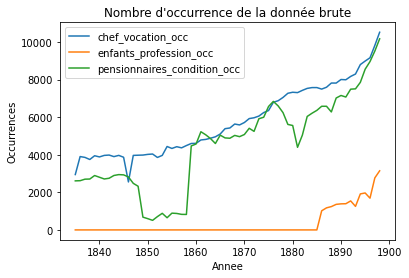

In [61]:
len_list_string = lambda l: 0 if len(l)==1 and len(l[0])==0 else len(l)

df_reduced["chef_vocation_occ"] = df_reduced["chef_vocation"].apply(len_list_string)
df_reduced["enfants_profession_occ"] = df_reduced["enfants_profession"].apply(len_list_string)
df_reduced["pensionnaires_condition_occ"] = df_reduced["pensionnaires_condition"].apply(len_list_string)
df_reduced["profession_occ"] = df_reduced["profession"].apply(len_list_string)
df_reduced_occ = df_reduced[["chef_vocation_occ", "enfants_profession_occ", "pensionnaires_condition_occ", "annee"]]
df_reduced_occ.groupby("annee").sum().plot(title="Nombre d'occurrence de la donnée brute", xlabel="Annee", ylabel="Occurrences")

### We remove enfants_profession for our analysis

In [9]:
from ast import literal_eval

df_reduced = pd.read_csv(PROCESSED_DATA_DIR+'df_reduced.csv')
df_reduced[["chef_vocation", "pensionnaires_condition", "profession"]] = df_reduced[["chef_vocation", "pensionnaires_condition", "profession"]].applymap(literal_eval)
df_reduced

,chef_vocation,enfants_profession,pensionnaires_condition,annee,profession
0,[ve de framages],[''],[],1861,[ve de framages]
1,[journalier],[''],[commis negociant],1861,"[journalier, commis negociant]"
2,[caregent],[''],[app cais negt],1861,"[caregent, app cais negt]"
3,"[gaciant trapre, louis]",[''],"[pensionnaire, pensionnaire, domestique, ind]",1861,"[gaciant trapre, louis, pensionnaire, pensionn..."
4,[],[''],"[id es, id es]",1861,"[id es, id es]"
...,...,...,...,...,...
378721,[rentier],[''],[],1858,[rentier]
378722,[journalier],[''],[],1858,[journalier]
378723,[],[''],[],1858,[]
378724,[fomme de lestre],[''],[],1858,[fomme de lestre]


In [10]:
df_job_year = df_reduced[["profession", "annee"]].explode("profession").copy()
df_job_year = df_job_year[~df_job_year["profession"].isin({"·", ""})]
df_job_year = df_job_year.dropna()
df_job_year["occ"] = 1 
df_job_year

,profession,annee,occ
0,ve de framages,1861,1
1,journalier,1861,1
1,commis negociant,1861,1
2,caregent,1861,1
2,app cais negt,1861,1
...,...,...,...
378720,journalier,1858,1
378721,rentier,1858,1
378722,journalier,1858,1
378724,fomme de lestre,1858,1


<AxesSubplot:title={'center':'Occurences chef_vocation et pensionnaires_condition par année avant nettoyage'}, xlabel='Annee'>

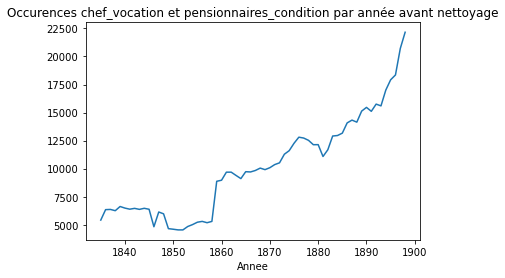

In [12]:
df_job_year.groupby("annee")["occ"].sum().plot(title="Occurences chef_vocation et pensionnaires_condition par année avant nettoyage", xlabel="Annee")

In [14]:
correct_terms = sorted(set(pd.read_csv(PROCESSED_DATA_DIR + "correct_terms.csv")["0"]))

<AxesSubplot:title={'center':'Occurences chef_vocation et pensionnaires_condition par année après séléction des occurrences nettoyées'}, xlabel='Annee'>

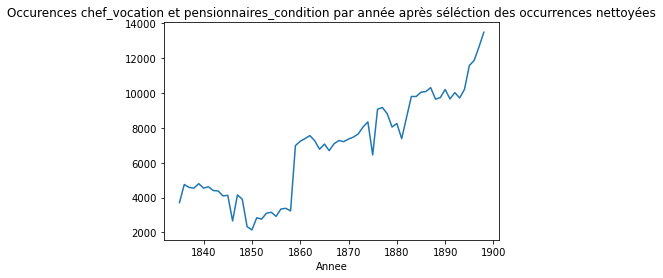

In [15]:
df_correct_job_year = df_job_year[df_job_year["profession"].isin(correct_terms)].copy()
df = df_correct_job_year.groupby(["profession", "annee"]).agg("count").reset_index()

df.groupby("annee")["occ"].sum().plot(title="Occurences chef_vocation et pensionnaires_condition par année après séléction des occurrences nettoyées", xlabel="Annee")



<AxesSubplot:title={'center':"% d'occurrence des métiers gardées par année"}, xlabel='Annee'>

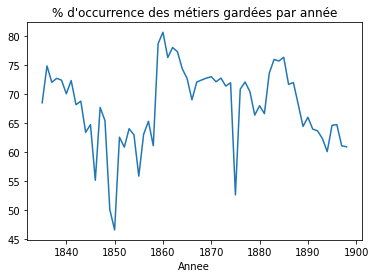

In [26]:
(df.groupby("annee")["occ"].sum() / df_job_year.groupby("annee")["occ"].sum() * 100).plot(title="% d'occurrence des métiers gardées par année", xlabel="Annee")


In [28]:
df.groupby("annee")["occ"].sum().sort_values()

annee
1850     2141
1849     2328
1846     2657
1852     2760
1851     2839
        ...  
1887    10308
1895    11573
1896    11872
1897    12645
1898    13488
Name: occ, Length: 64, dtype: int64

In [4]:
df.to_pickle("occ_job_year.pkl")
df

,profession,annee,occ
0,agent,1845,1
1,agent,1848,1
2,agent,1858,12
3,agent,1859,1
4,agent,1863,1
...,...,...,...
10976,volontaire,1894,15
10977,volontaire,1895,40
10978,volontaire,1896,23
10979,volontaire,1897,15


## Analysis

In [ ]:
"cordonnier " "cordonnier"

In [3]:
df = pd.read_pickle("occ_job_year.pkl")
df["profession"].unique()

array(['agent', 'agent de police', 'agriculteur', 'aide', 'apprenti',
       'apprenti negociant', 'apprentie', 'apprentie couturiere',
       'apprentie modiste', 'apprentie tailleuse', 'architecte',
       'armurier', 'arpenteur', 'aubergiste', 'avocat', 'banquier',
       'batelier', 'bijoutier', 'blanchisseuse', 'bonne', 'bottier',
       'boucher', 'boulanger', 'bucheron', 'cafetier', 'carrier',
       'caveur', 'ceinturier', 'chapelier', 'chapellier', 'charcutier',
       'charpentier', 'charrelier', 'charretier', 'charron',
       'chaudronnier', 'chauffeur', 'chirurgien', 'cimenteur', 'clerc',
       'cocher', 'coiffeur', 'commis', 'commissionnaire', 'compagne',
       'compositeur', 'comptable', 'concierge', 'conducteur', 'confiseur',
       'conseiller', 'cordonnier', 'cordonnier ', 'cordonnier/couturier?',
       'corroyeur', 'courtier', 'couturiere', 'couvreur', 'cuisinier',
       'cuisiniere', 'cullotier', 'cultivateur', 'demoiselle de magasin',
       'directeur', 'disci

In [5]:
df.iloc[df[df["profession"] =="dque"].index, 0] = "domestique"
df.iloc[df[df["profession"] =="dque"].index, 0] = "domestique"

In [6]:
count_per_job = df.groupby("profession")["occ"].sum()
count_per_job

profession
agent                 31
agent de police      452
agriculteur        10411
aide                 557
apprenti            1896
                   ...  
vigneron            4785
vigneronne            40
vitrier              269
voiturier            911
volontaire           264
Name: occ, Length: 254, dtype: int64

In [7]:
# We keep only jobs with in average more than 15 occurrences by year

top_job = list(count_per_job[count_per_job > 640].index)

In [8]:
import matplotlib.pyplot as plt


def plot_evolution(job_name):
    data = df[df["profession"]==job_name]
    plt.plot(data["annee"], data["occ"])
    plt.title(job_name)
    plt.savefig("./data/plots/"+job_name + ".png")
    plt.show()

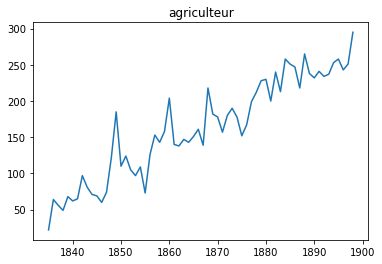

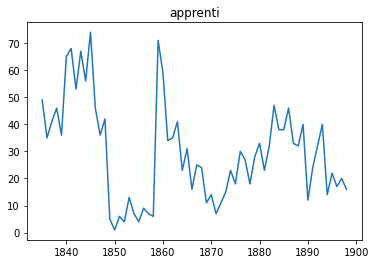

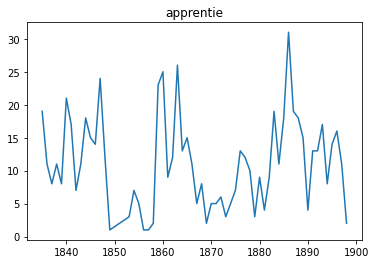

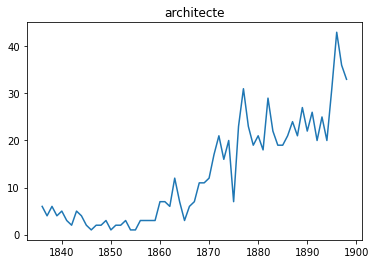

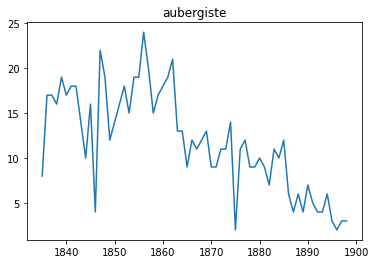

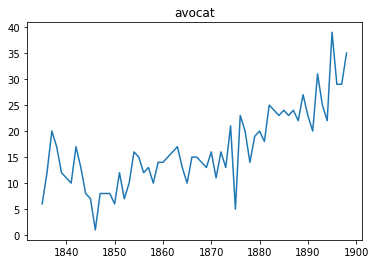

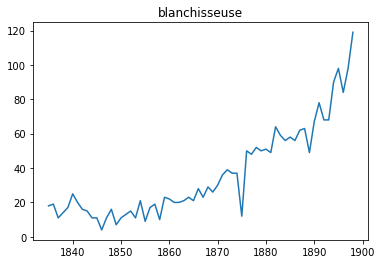

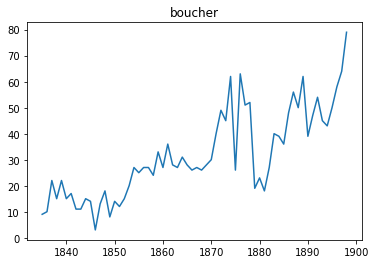

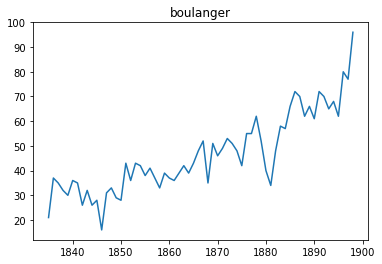

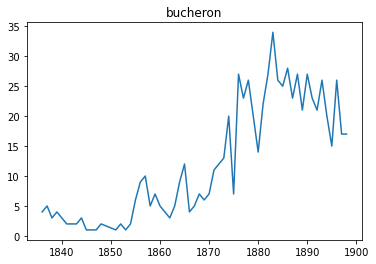

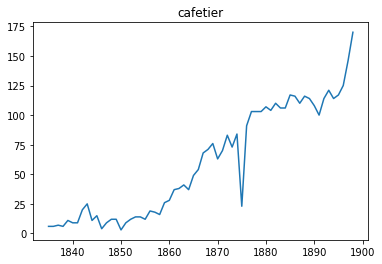

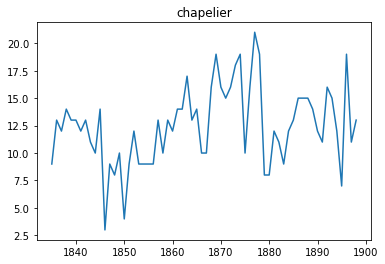

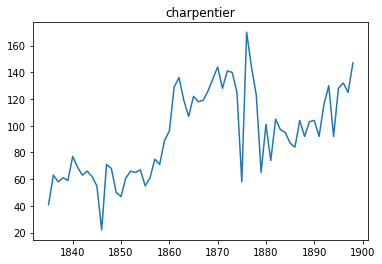

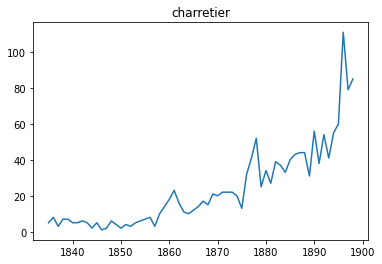

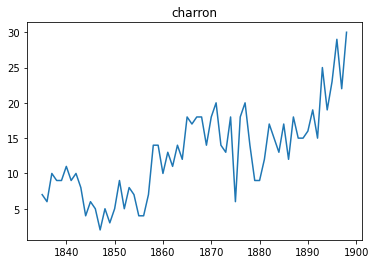

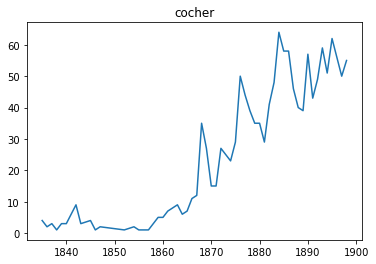

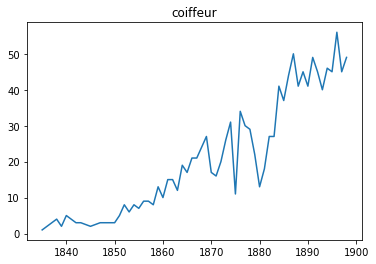

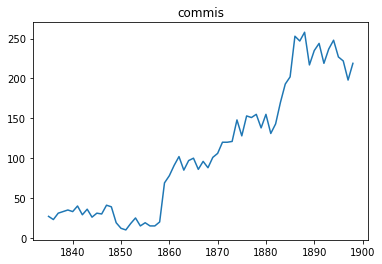

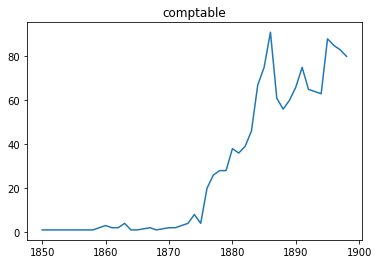

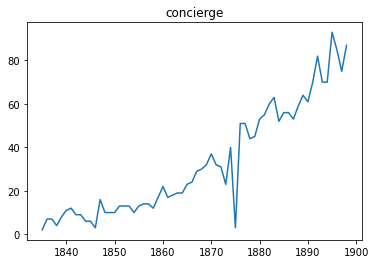

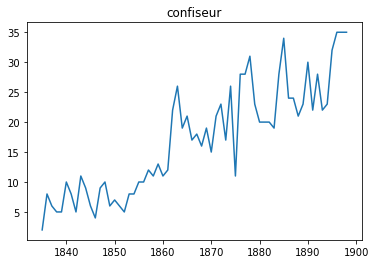

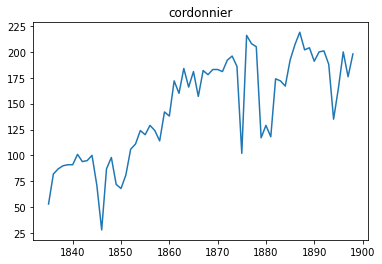

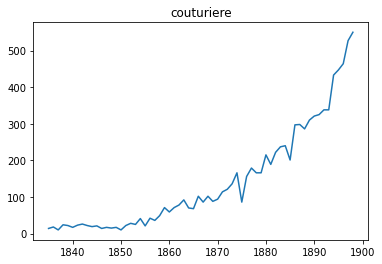

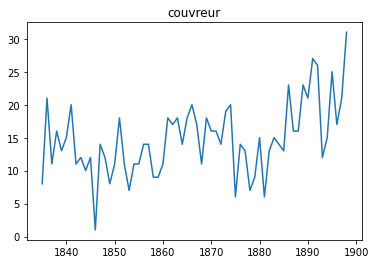

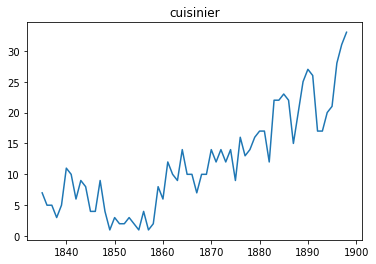

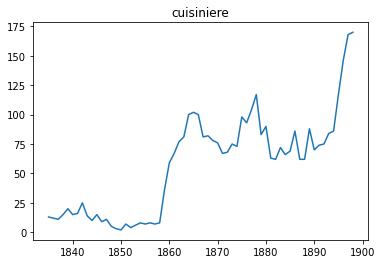

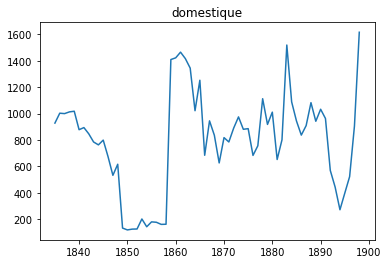

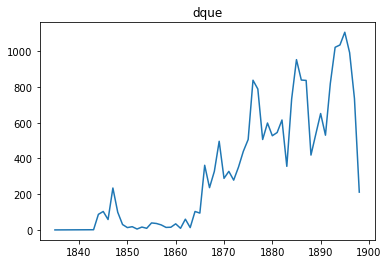

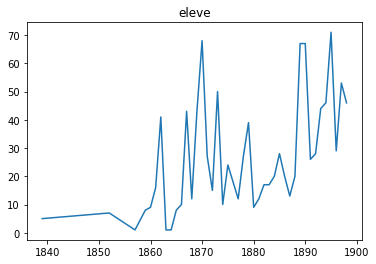

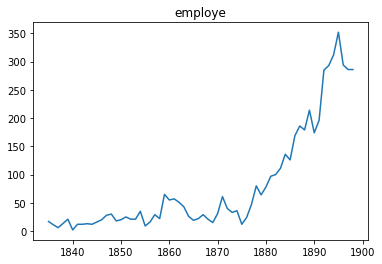

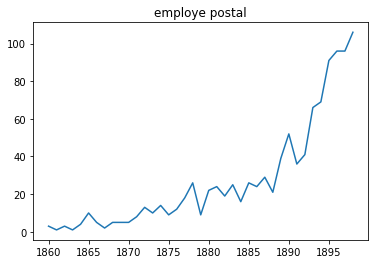

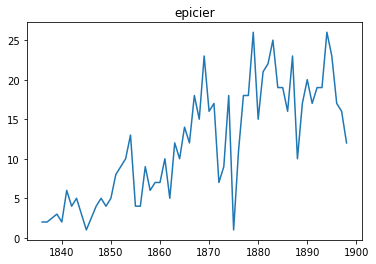

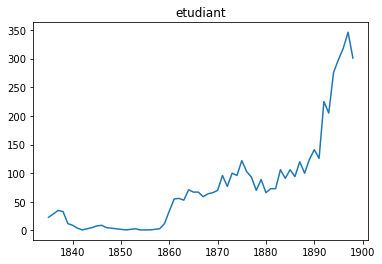

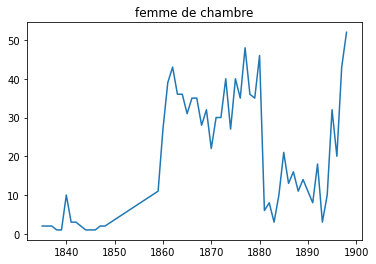

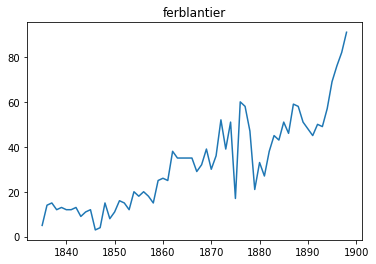

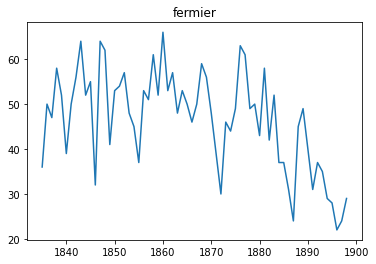

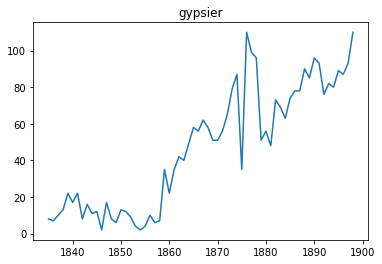

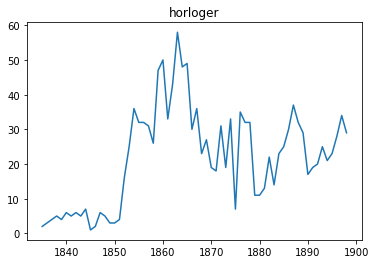

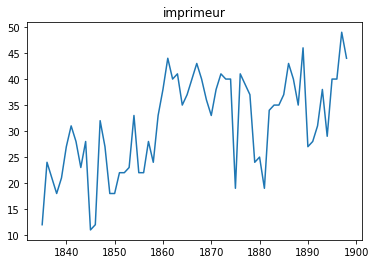

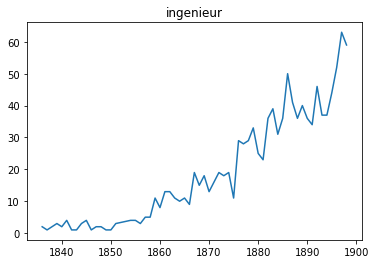

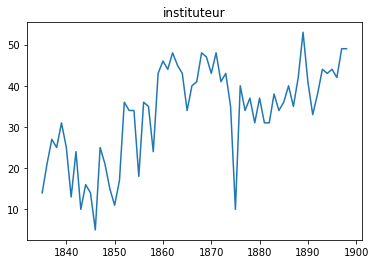

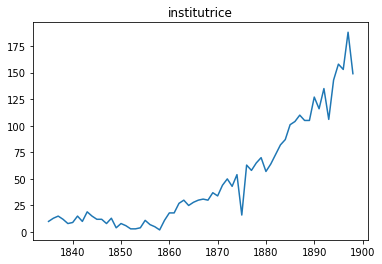

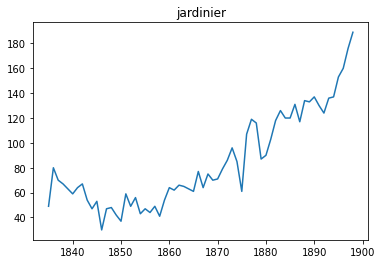

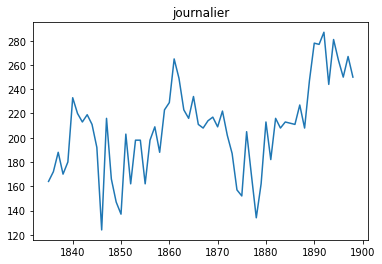

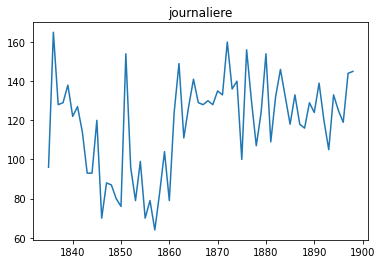

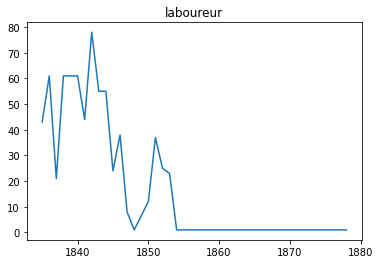

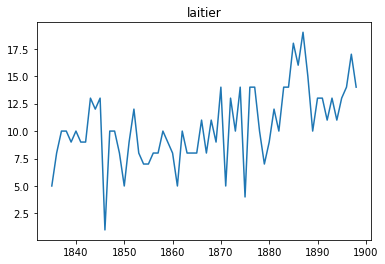

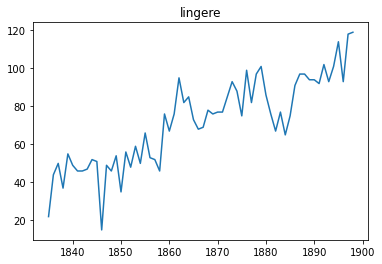

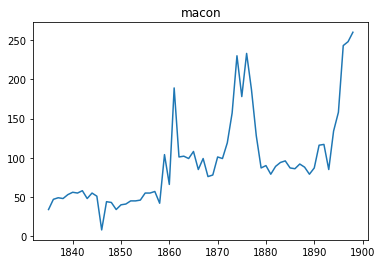

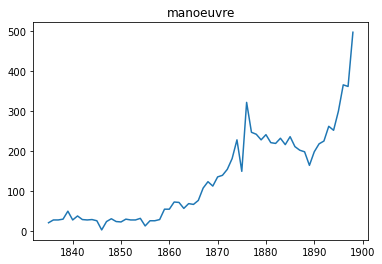

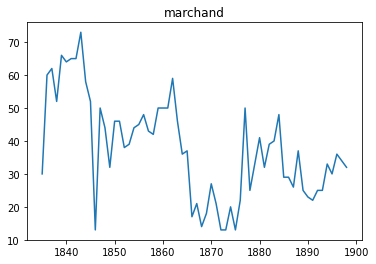

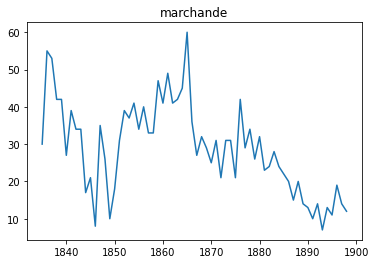

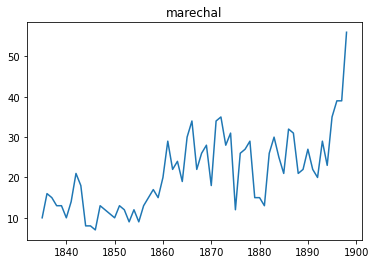

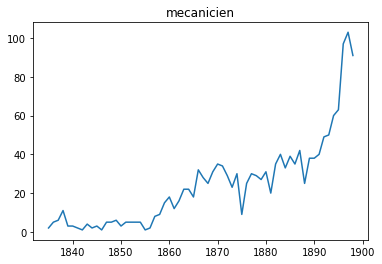

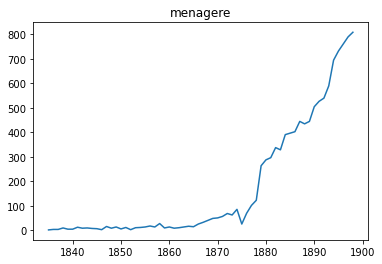

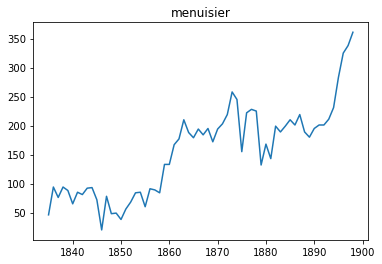

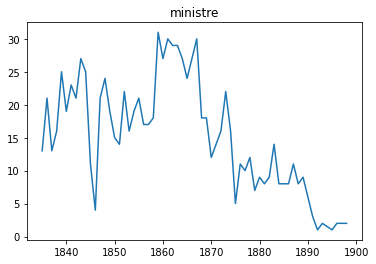

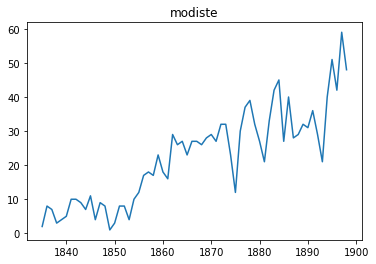

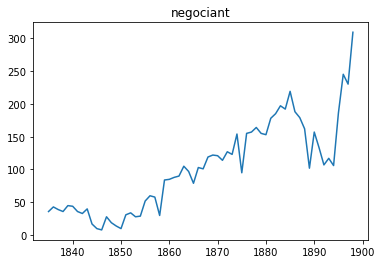

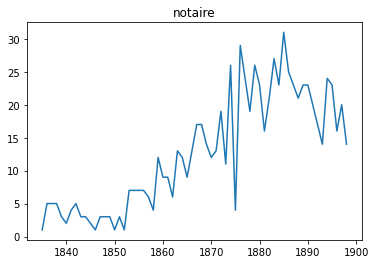

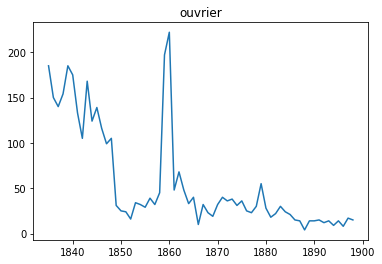

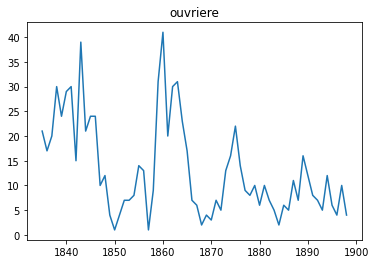

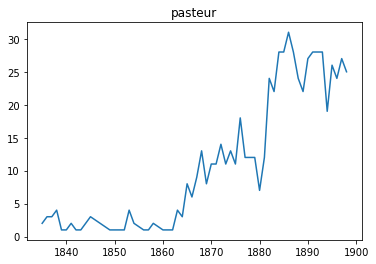

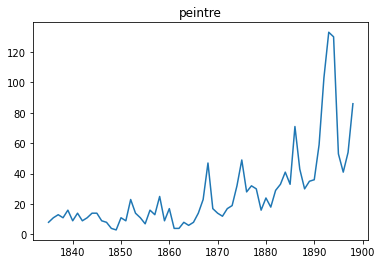

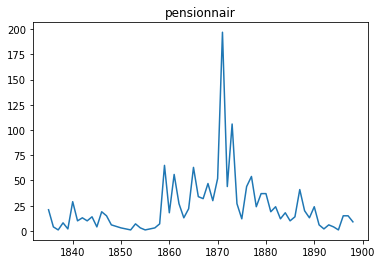

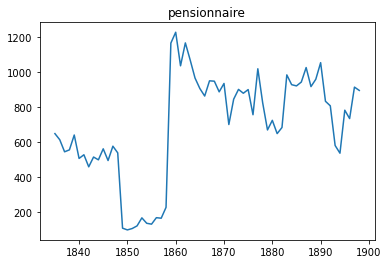

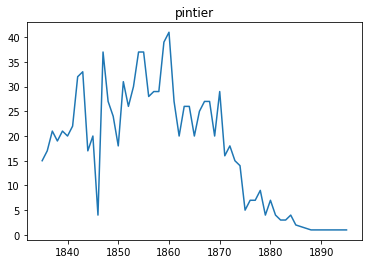

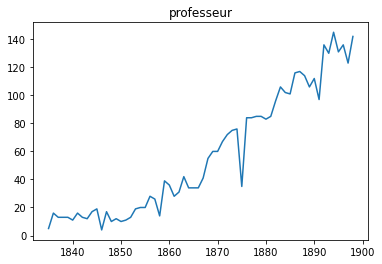

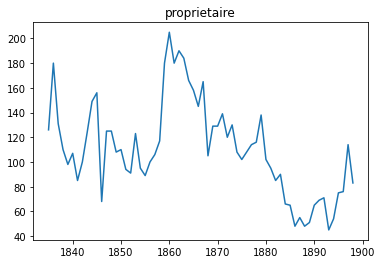

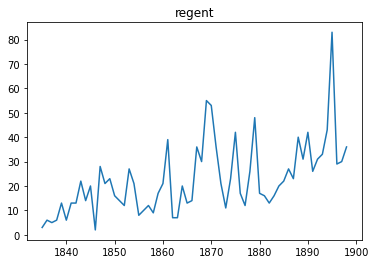

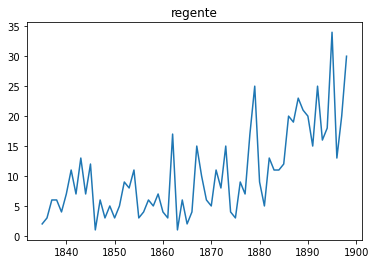

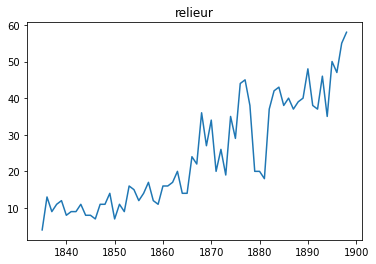

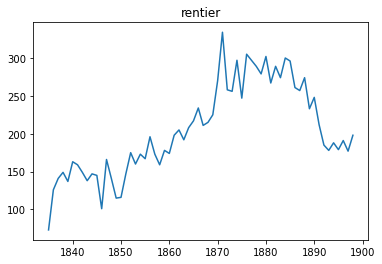

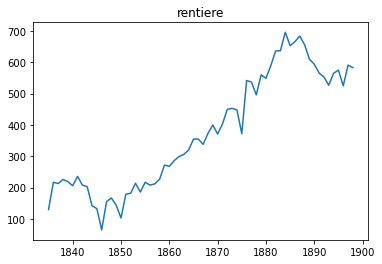

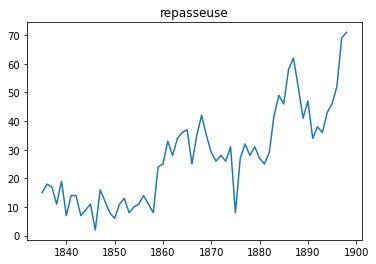

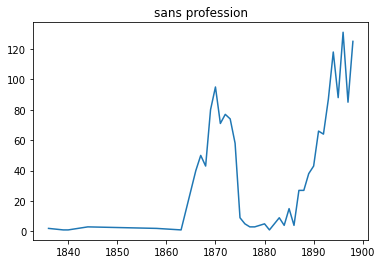

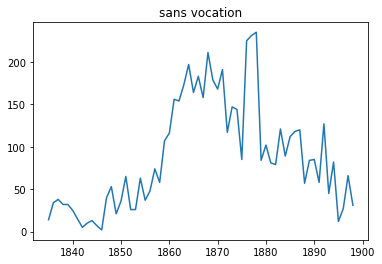

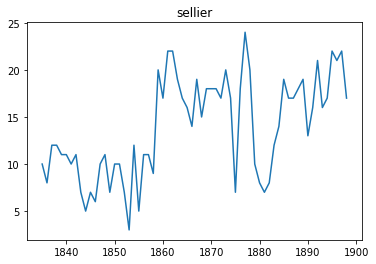

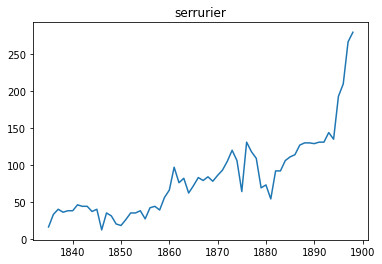

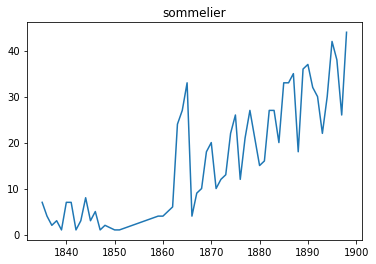

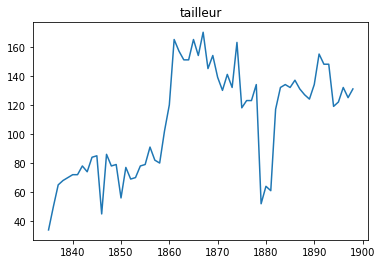

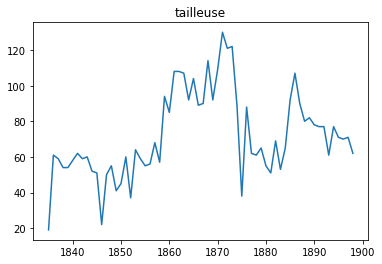

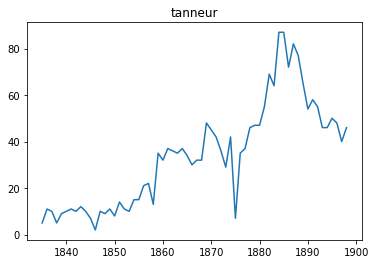

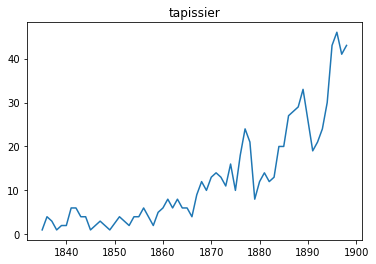

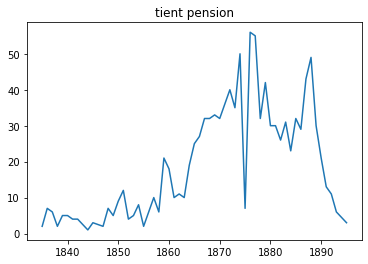

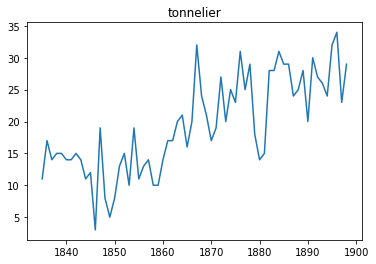

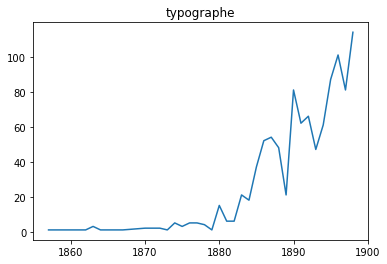

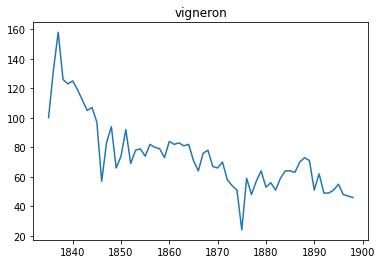

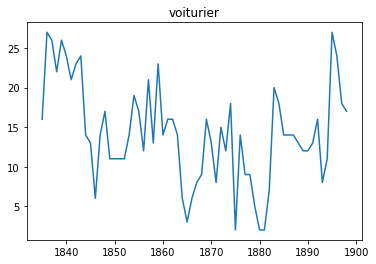

In [58]:
for job in top_job:
    plot_evolution(job) 

In [9]:
def plot_evolution_percent(df, job_name):
    data = df[df["profession"]==job_name]
    plt.plot(data["annee"], data["occ_per"] * 100)
    plt.title("% of "+job_name)
    plt.savefig("./data/plots_percent/"+job_name + ".png")
    plt.show()

In [10]:
df_join = df.set_index("annee").join(df.groupby("annee")["occ"].sum().to_frame(), lsuffix = "_job", rsuffix ="_pop")
df_join


,profession,occ_job,occ_pop
annee,,,
1835,agriculteur,22,3706
1835,apprenti,49,3706
1835,apprentie,19,3706
1835,apprentie tailleuse,1,3706
1835,armurier,3,3706
...,...,...,...
1898,veuve,2,13488
1898,vigneron,46,13488
1898,vitrier,14,13488


In [13]:
df_join["occ_per"] = df_join["occ_job"] / df_join["occ_pop"]
df_join

,profession,occ_job,occ_pop,occ_per
annee,,,,
1835,agriculteur,22,3706,0.005936
1835,apprenti,49,3706,0.013222
1835,apprentie,19,3706,0.005127
1835,apprentie tailleuse,1,3706,0.000270
1835,armurier,3,3706,0.000809
...,...,...,...,...
1898,veuve,2,13488,0.000148
1898,vigneron,46,13488,0.003410
1898,vitrier,14,13488,0.001038


In [11]:
data = df["occ"]/ df.groupby("annee")["occ"].sum().values
data 

ValueError: operands could not be broadcast together with shapes (10981,) (64,) 

In [82]:
df[df["profession"]=="agent"]["occ"].values

array([ 1,  1, 12,  1,  1,  1,  1,  1,  1,  1,  1,  1,  6,  1,  1])

In [78]:
df.groupby("annee")["occ"].sum().values

array([ 3706,  4747,  4581,  4543,  4795,  4539,  4617,  4401,  4379,
        4097,  4127,  2657,  4151,  3905,  2328,  2141,  2839,  2760,
        3098,  3155,  2917,  3339,  3381,  3234,  6979,  7230,  7386,
        7554,  7258,  6772,  7066,  6694,  7086,  7273,  7207,  7357,
        7468,  7649,  8050,  8342,  6446,  9067,  9169,  8815,  8049,
        8250,  7380,  8592,  9801,  9800, 10045, 10085, 10308,  9646,
        9741, 10201,  9660, 10023,  9716, 10211, 11573, 11872, 12645,
       13488])

ValueError: x and y must have same first dimension, but have shapes (64,) and (128,)

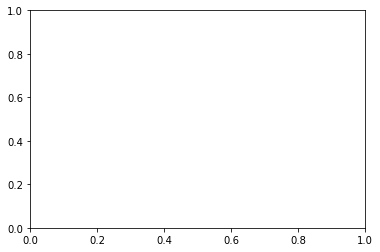

In [72]:
for job in top_job:
    plot_evolution_percent(job) 